In [1]:
%who

Interactive namespace is empty.


In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import datetime
import matplotlib

# getting the spatial plotting function from another directory
import sys
new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs
%run -i drought_2017to2019/dataInfo_and_functions.py

import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/'
era5land_file = 'PminusET_era5land_monthly_1950_2022.nc'
gleam_file = 'PminusET_mswep_gleam_monthly_1980_2020.nc'
awra_file = 'PminusET_agcd_awra_monthly_1911_2020.nc'

ds_era5land = xr.open_dataset(data_dir + era5land_file)
ds_gleam = xr.open_dataset(data_dir + gleam_file)
ds_awra = xr.open_dataset(data_dir + awra_file)

vname = 'PminusET'

# the monthly climatology from long-term data
time_slice = slice('1981-01-01', '2020-05-31')
da_era5land_lt_monClim = ds_era5land[vname].sel(time = time_slice).groupby('time.month').mean('time')
da_gleam_lt_monClim = ds_gleam[vname].sel(time = time_slice).groupby('time.month').mean('time')
da_awra_lt_monClim = ds_awra[vname].sel(time = time_slice).groupby('time.month').mean('time')

# the monthly anomalies during the drought period
time_slice = slice('2016-12-01', '2020-12-31')
da_era5land_monAnom = ds_era5land[vname].sel(time = time_slice).groupby('time.month') - da_era5land_lt_monClim
da_gleam_monAnom = ds_gleam[vname].sel(time = time_slice).groupby('time.month') - da_gleam_lt_monClim
da_awra_monAnom = ds_awra[vname].sel(time = time_slice).groupby('time.month') - da_awra_lt_monClim

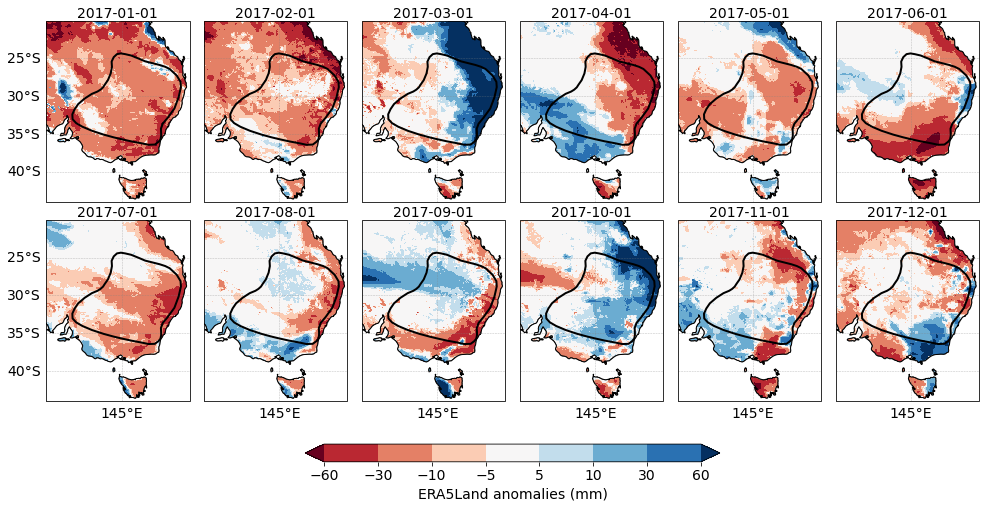

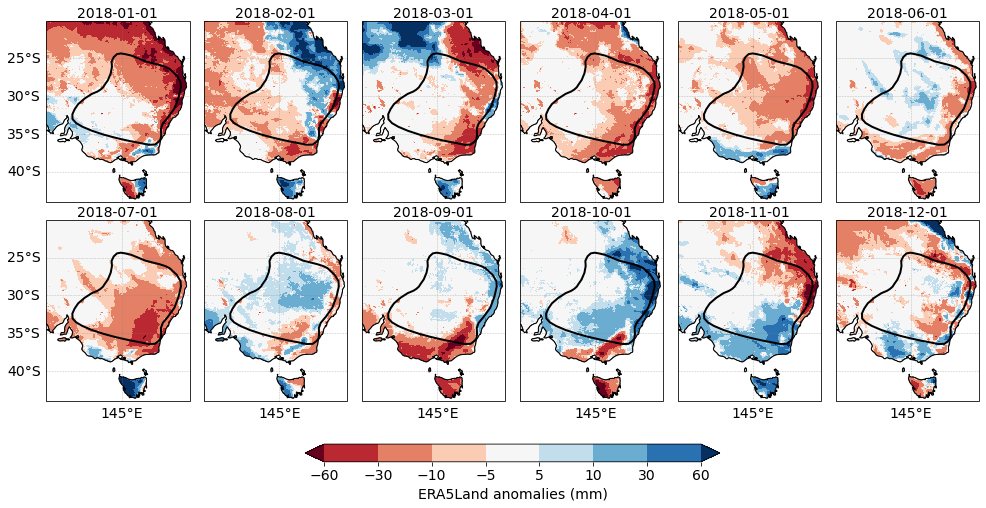

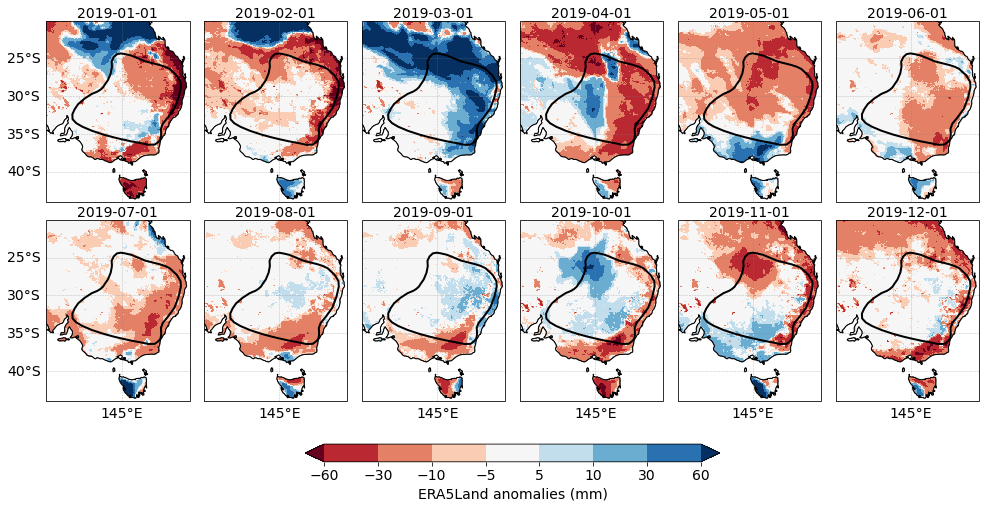

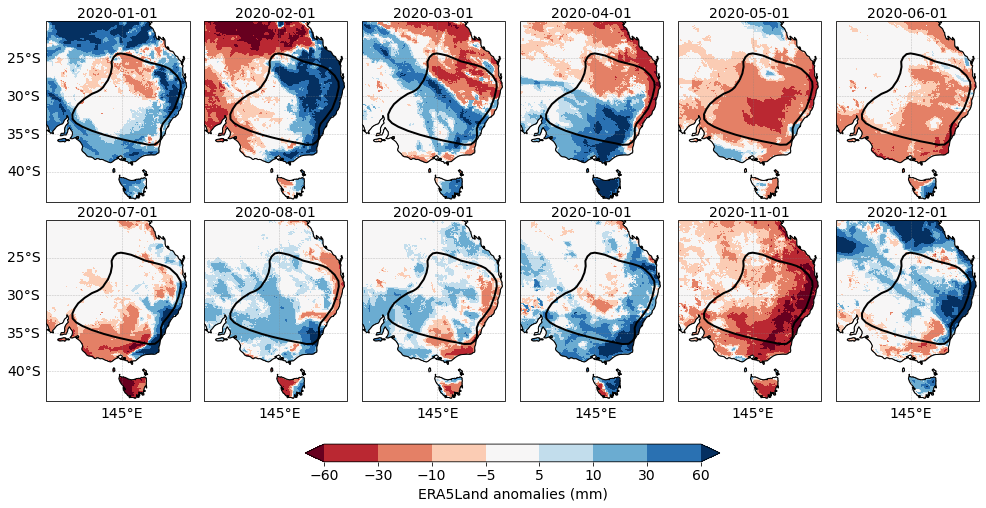

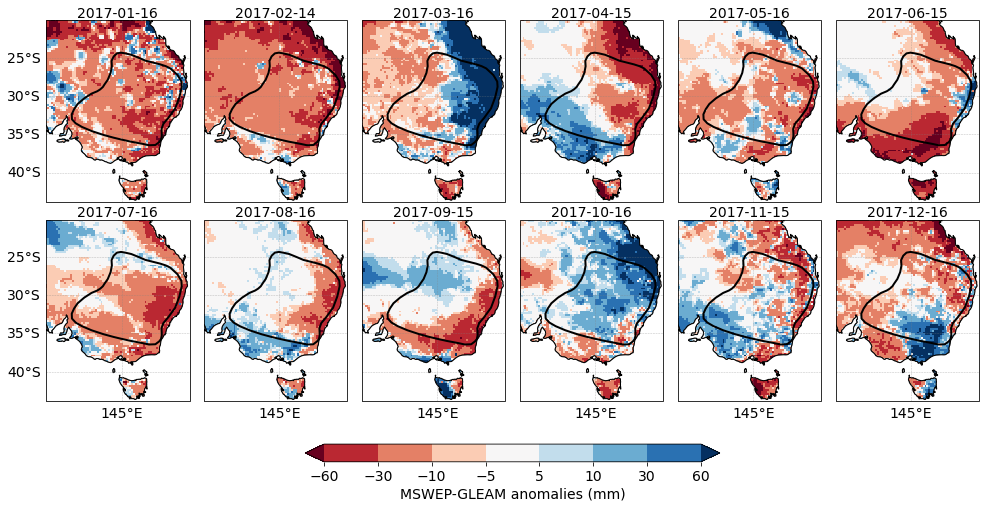

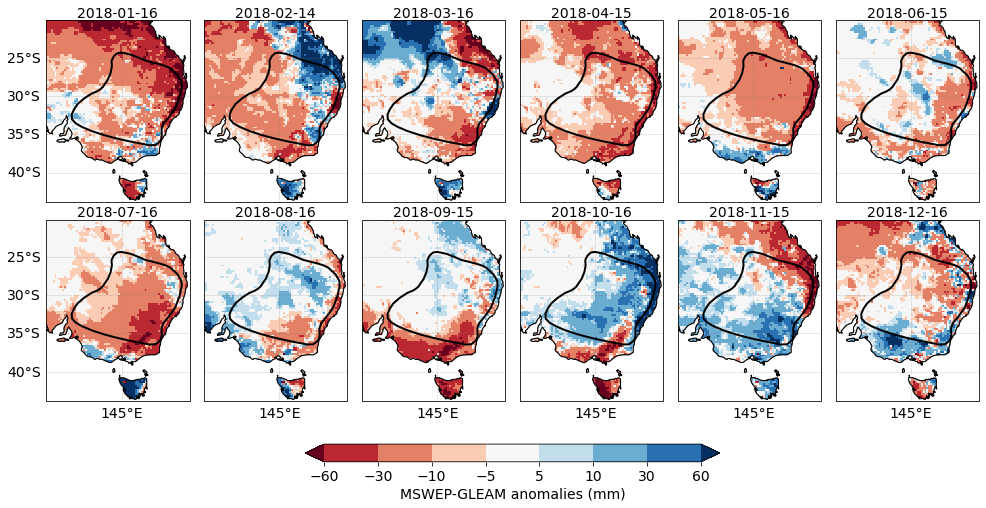

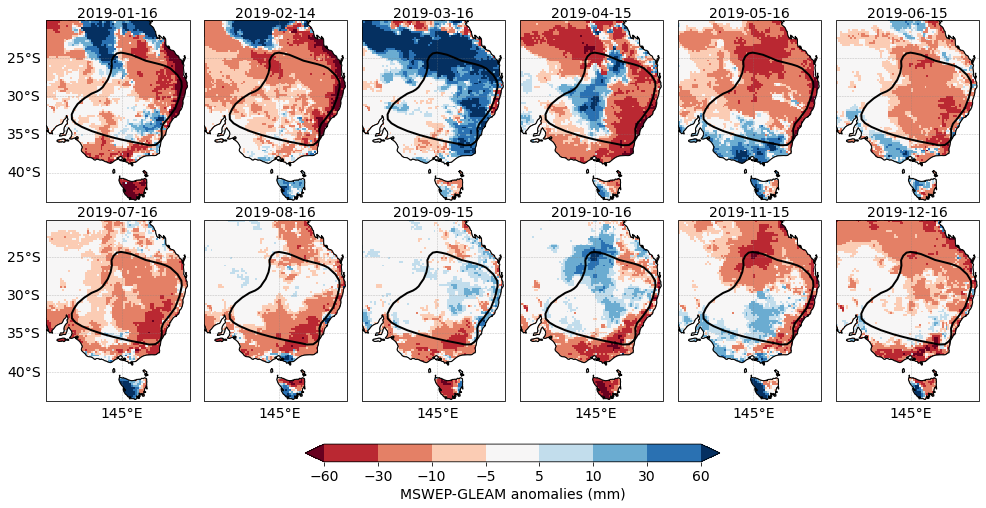

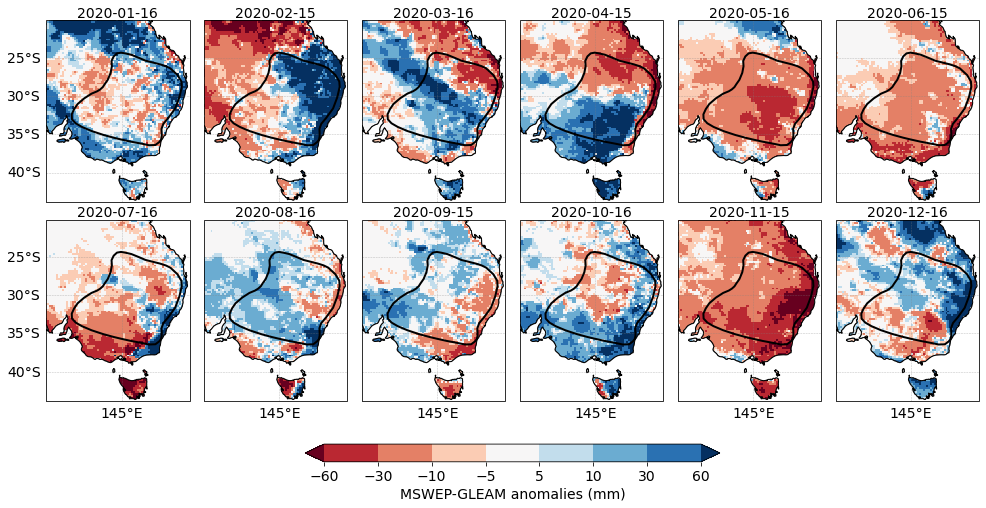

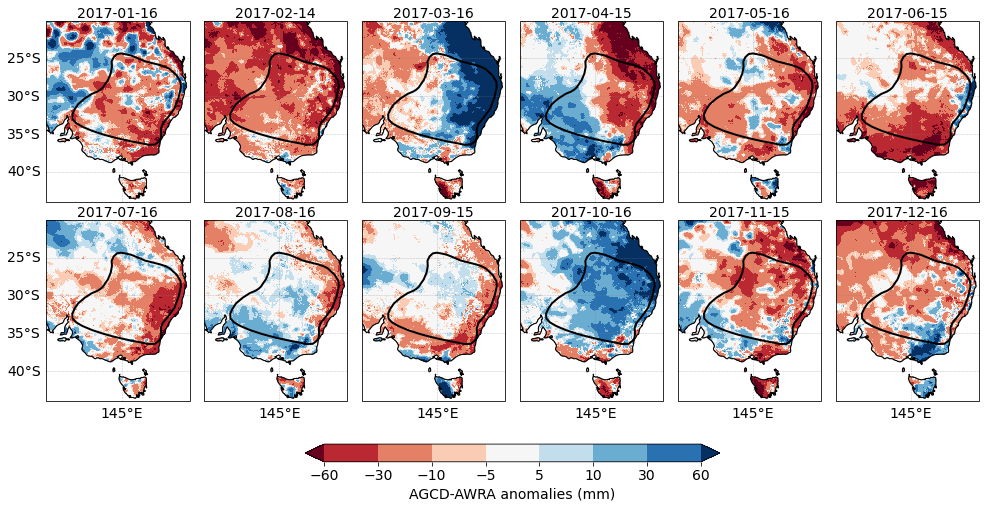

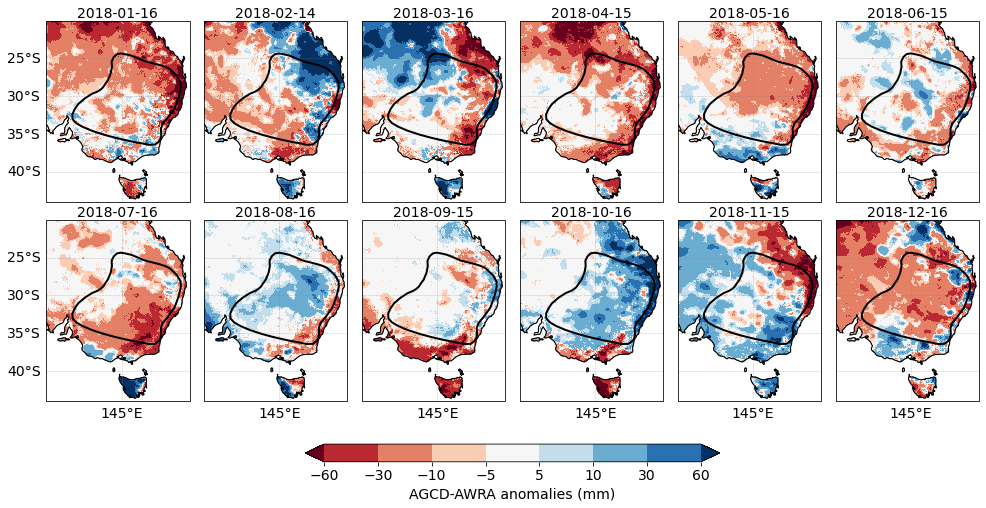

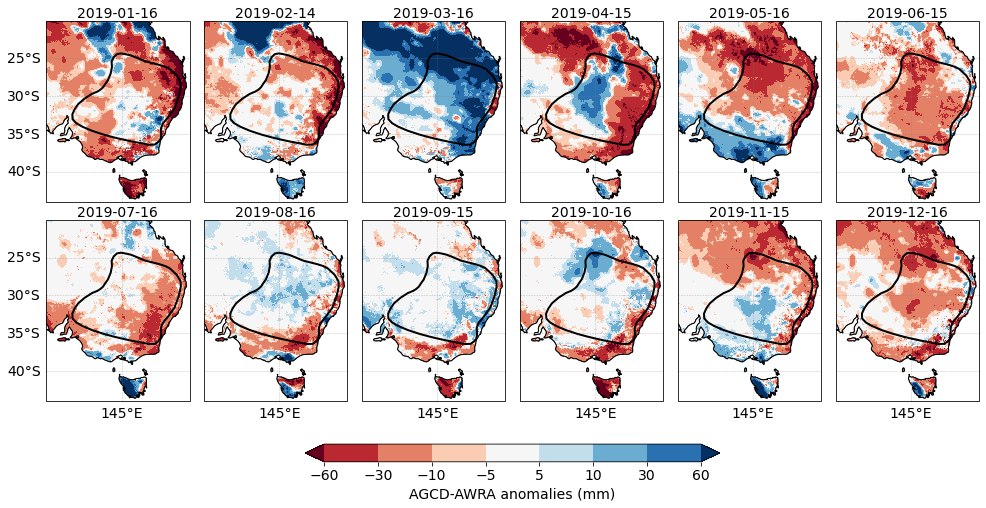

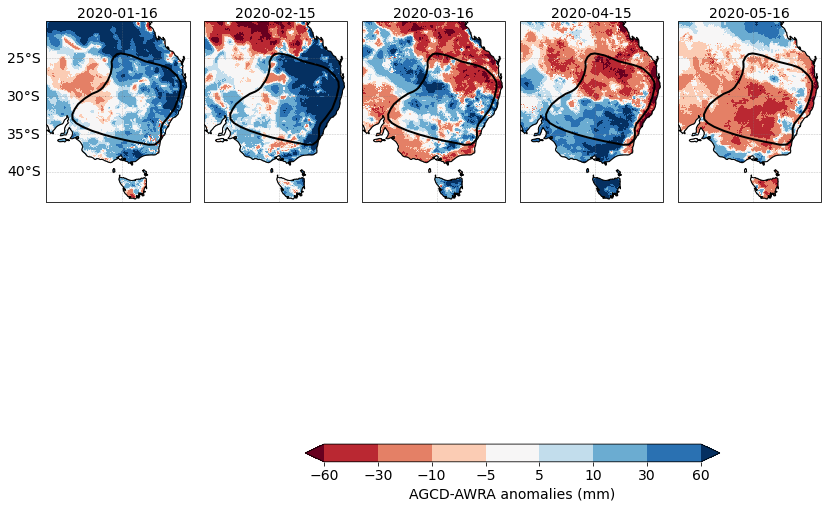

In [6]:
out_dir = 'figures/drought_2017to2020/PminusE/'
figname_prefix = 'PminusE_monAnom'

sh_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

current_cmap = matplotlib.cm.get_cmap("RdBu").copy()
current_cmap.set_bad(color='lightgrey')

data_list = [da_era5land_monAnom, da_gleam_monAnom, da_awra_monAnom]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']
    
for iDat in range(len(data_list)):  
    for year in [2017, 2018, 2019, 2020]:
        da_year = data_list[iDat].sel(time = str(year))
        # if data_names[iDat] == 'MSWEP-GLEAM':
        #     plot_list = [da_year.isel(time = i).transpose() for i in range(len(da_year.time.values))]
        # else:
        plot_list = [da_year.isel(time = i) for i in range(len(da_year.time.values))] 

        subplot_title = [np.datetime_as_string(x.time.values, unit='D') for x in plot_list]

        levels = [-60, -30, -10, -5, 5, 10, 30, 60]
        out_figname = data_names[iDat] + '_' + figname_prefix + '_' + str(year)
        myfuncs.draw_pcolormesh_Npanels(plot_list, cmap = current_cmap, ncols = 6, nrows = 2, panel_width=2.4, panel_height=4.1, levels=levels, 
                                        subplot_title = subplot_title, shapefile = sh_file, shapefile_color = 'black',
                                        out_dir = out_dir, out_figname = out_figname, cbar_label=data_names[iDat]+' anomalies (mm)') #, cbar_extend='max')

### Region average plots

In [4]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusET/drought_focusRegavg/'
era5land_file = 'PminusET_era5land_monthly_1950_2022.nc'
gleam_file = 'PminusET_mswep_gleam_monthly_1980_2020.nc'
awra_file = 'PminusET_agcd_awra_monthly_1911_2020.nc'

ds_era5land = xr.open_dataset(data_dir + era5land_file)
ds_gleam = xr.open_dataset(data_dir + gleam_file)
ds_awra = xr.open_dataset(data_dir + awra_file)

vname = 'PminusET'

# the monthly climatology from long-term data
time_slice = slice('1981-01-01', '2020-05-31')
da_era5land_lt_monClim = ds_era5land[vname].sel(time = time_slice).groupby('time.month').mean('time')
da_gleam_lt_monClim = ds_gleam[vname].sel(time = time_slice).groupby('time.month').mean('time')
da_awra_lt_monClim = ds_awra[vname].sel(time = time_slice).groupby('time.month').mean('time')

# the monthly anomalies during the drought period
time_slice = slice('2016-12-01', '2020-12-31')
da_era5land_monAnom = ds_era5land[vname].sel(time = time_slice).groupby('time.month') - da_era5land_lt_monClim
da_gleam_monAnom = ds_gleam[vname].sel(time = time_slice).groupby('time.month') - da_gleam_lt_monClim
da_awra_monAnom = ds_awra[vname].sel(time = time_slice).groupby('time.month') - da_awra_lt_monClim

# changing the era5land time to the middle of the month - using the gleam time array
da_era5land_monAnom = da_era5land_monAnom.assign_coords({'time': da_gleam_monAnom.time.values})

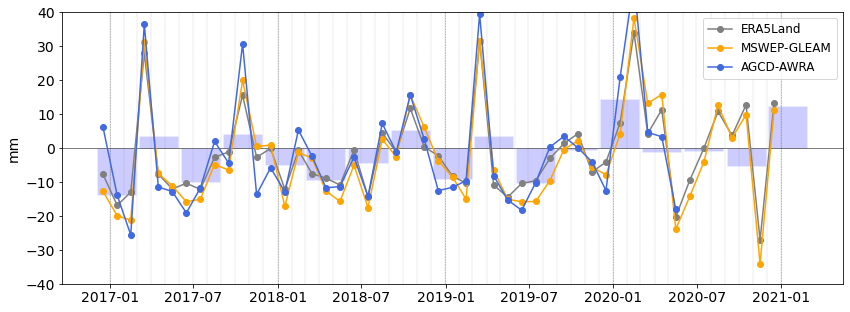

In [9]:
out_dir = 'figures/drought_2017to2020/PminusE/'
col_sel = ['grey', 'orange', 'royalblue']
data_list = [da_era5land_monAnom, da_gleam_monAnom, da_awra_monAnom]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']

da_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(14,5)) #width, height

seas_breaks = pd.date_range('2016-12-31', freq='M', periods=12*4+1).to_numpy()#.astype(float)
year_breaks = pd.date_range('2016-12-31', freq='Y', periods=5).to_numpy()

xx = da_allDatamean.resample(time="QS-DEC").mean().time.values + np.timedelta64(45, 'D')
array_time = [x.astype('datetime64[D]') for x in xx]
array_val = da_allDatamean.resample(time="QS-DEC").mean().values
plt.bar(array_time, array_val, width=85, edgecolor='white', color='blue', alpha=0.2)

for xline in seas_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
for xline in year_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

plt.axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
for da, color, label in zip(data_list, col_sel, data_names):       
    plt.plot(da.time.values, da.values, marker='o', color=color, label=label)
             #ecolor='lightsteelblue', elinewidth=3, capsize=0)
#da_sm_monAnom_regAvg.plot.line(color="royalblue", marker="o", linewidth=1)
plt.xlabel('')
plt.ylabel('mm')
plt.ylim((-40, 40))
plt.legend(loc=0)

fig.savefig(out_dir + 'areaAvg_PminusE_anom_from_monClim_inmm.png', bbox_inches='tight', dpi = 600)
fig.savefig(out_dir + 'areaAvg_PminusE_anom_from_monClim_inmm.pdf', bbox_inches='tight', format = 'pdf')

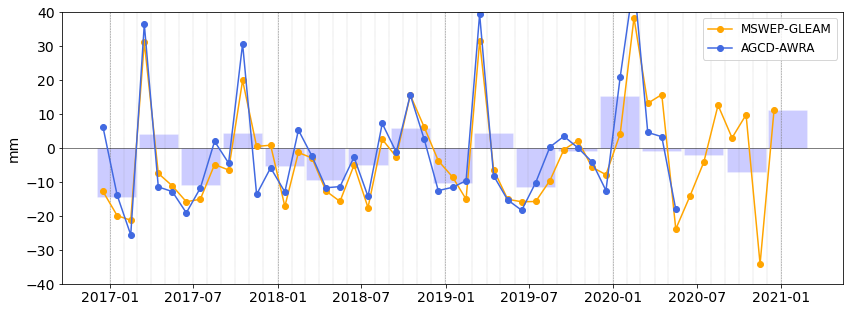

In [10]:
out_dir = 'figures/drought_2017to2020/PminusE/'
col_sel = ['orange', 'royalblue']
data_list = [da_gleam_monAnom, da_awra_monAnom]
data_names = ['MSWEP-GLEAM', 'AGCD-AWRA']

da_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(14,5)) #width, height

seas_breaks = pd.date_range('2016-12-31', freq='M', periods=12*4+1).to_numpy()#.astype(float)
year_breaks = pd.date_range('2016-12-31', freq='Y', periods=5).to_numpy()

xx = da_allDatamean.resample(time="QS-DEC").mean().time.values + np.timedelta64(45, 'D')
array_time = [x.astype('datetime64[D]') for x in xx]
array_val = da_allDatamean.resample(time="QS-DEC").mean().values
plt.bar(array_time, array_val, width=85, edgecolor='white', color='blue', alpha=0.2)

for xline in seas_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
for xline in year_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

plt.axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
for da, color, label in zip(data_list, col_sel, data_names):       
    plt.plot(da.time.values, da.values, marker='o', color=color, label=label)
             #ecolor='lightsteelblue', elinewidth=3, capsize=0)
#da_sm_monAnom_regAvg.plot.line(color="royalblue", marker="o", linewidth=1)
plt.xlabel('')
plt.ylabel('mm')
plt.ylim((-40, 40))
plt.legend(loc=0)

fig.savefig(out_dir + 'areaAvg_PminusE_anom_from_monClim_inmm_exEraLand.png', bbox_inches='tight', dpi = 600)
fig.savefig(out_dir + 'areaAvg_PminusE_anom_from_monClim_inmm_exEraLand.pdf', bbox_inches='tight', format = 'pdf')

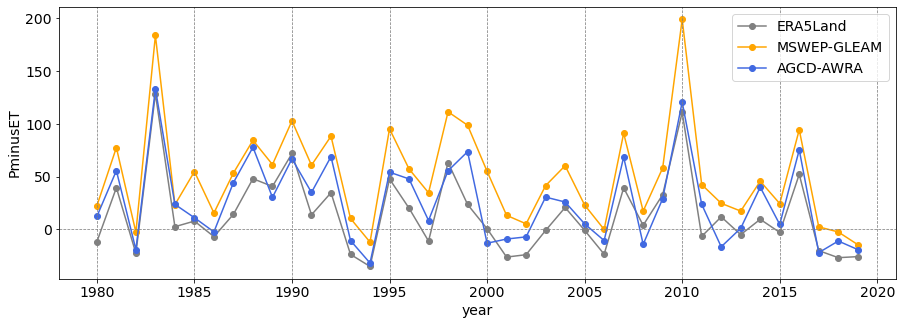

In [29]:
ds_era5land[vname].groupby('time.year').sum().sel(year = slice(1980, 2019)).plot(color = col_sel[0], size=5, aspect=3, marker="o", label='ERA5Land')
ds_gleam[vname].groupby('time.year').sum().sel(year = slice(1980, 2019)).plot(color = col_sel[1], marker="o", label='MSWEP-GLEAM')
ds_awra[vname].groupby('time.year').sum().sel(year = slice(1980, 2019)).plot(color = col_sel[2], marker="o", label='AGCD-AWRA')
plt.axhline(0, color = 'gray', linestyle='--', linewidth=0.75)
for xline in [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.75)
plt.legend(loc='upper right')
plt.savefig(out_dir + 'PminusE_yearly_1980_2019.png', bbox_inches='tight')

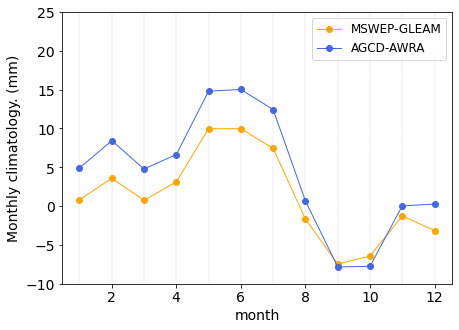

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(7,5)) #width, height

data_list = [da_era5land_lt_monClim, da_gleam_lt_monClim, da_awra_lt_monClim]

for xline in range(1, 13):
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)

for da, color, label in zip(data_list, col_sel, data_names):  
    plt.plot(da.month.values, da.values, color=color, marker="o", linewidth=1, label=label)
plt.xlabel('month')
plt.ylabel('Monthly climatology. (mm)')
plt.ylim((-10, 25))
plt.legend(loc='upper right')

fig.savefig(out_dir + 'PminusE_monClim_exEraLand.png', bbox_inches='tight', dpi = 600)
fig.savefig(out_dir + 'PminusE_monClim_exEraLand.pdf', bbox_inches='tight', format = 'pdf')

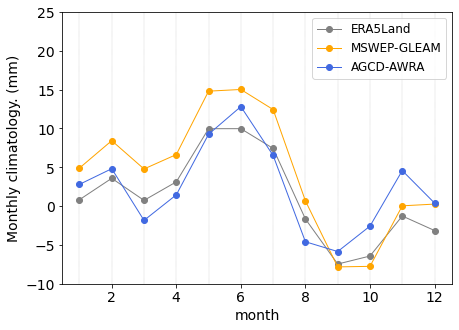

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(7,5)) #width, height

data_list = [da_era5land_lt_monClim, da_gleam_lt_monClim, da_awra_lt_monClim]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']
col_sel = ['grey', 'orange', 'royalblue']

for xline in range(1, 13):
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)

for da, color, label in zip(data_list, col_sel, data_names):  
    plt.plot(da.month.values, da.values, color=color, marker="o", linewidth=1, label=label)
plt.xlabel('month')
plt.ylabel('Monthly climatology. (mm)')
plt.ylim((-10, 25))
plt.legend(loc='upper right')

fig.savefig(out_dir + 'PminusE_monClim.png', bbox_inches='tight', dpi = 600)
fig.savefig(out_dir + 'PminusE_monClim.pdf', bbox_inches='tight', format = 'pdf')

### Anomalies in % (to mention in the text)

In [18]:
data_list = [da_era5land_monAnom, da_gleam_monAnom, da_awra_monAnom]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']
da_anom_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

data_list = [da_era5land_lt_monClim, da_gleam_lt_monClim, da_awra_lt_monClim]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']
da_clim_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

anom_seasMean = da_anom_allDatamean.resample(time="QS-DEC").mean()
clim_seasMean = da_clim_allDatamean.sel(month = da_anom_allDatamean['time.month'].values).rename({'month':'time'})\
.assign_coords({'time':da_anom_allDatamean.time.values}).resample(time="QS-DEC").mean()

df_anom = pd.DataFrame({'season':anom_seasMean.time.values,
                        'anomaly (mm)': np.round(anom_seasMean, 5).values,
                        'perc_anomaly (%)': np.round(anom_seasMean/clim_seasMean*100,1).values,
                       'climatology (mm)': np.round(clim_seasMean, 5).values})
print(df_anom)

out_file = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/seas_PminusE_anomalies.csv'
df_anom.to_csv(out_file)

       season  anomaly (mm)  perc_anomaly (%)  climatology (mm)
0  2016-12-01     -13.90235            -546.5           2.54373
1  2017-03-01       3.63132              66.7           5.44043
2  2017-06-01     -10.02916            -153.9           6.51734
3  2017-09-01       4.20649            -109.7          -3.83551
4  2017-12-01      -4.93623            -194.1           2.54373
5  2018-03-01      -9.37082            -172.2           5.44043
6  2018-06-01      -4.50624             -69.1           6.51734
7  2018-09-01       5.16691            -134.7          -3.83551
8  2018-12-01      -9.13864            -359.3           2.54373
9  2019-03-01       3.55113              65.3           5.44043
10 2019-06-01     -10.31084            -158.2           6.51734
11 2019-09-01      -0.69371              18.1          -3.83551
12 2019-12-01      14.37982             565.3           2.54373
13 2020-03-01      -1.13106             -20.8           5.44043
14 2020-06-01      -0.80926             

In [20]:
data_list = [da_gleam_monAnom, da_awra_monAnom]
data_names = ['MSWEP-GLEAM', 'AGCD-AWRA']
da_anom_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

data_list = [da_gleam_lt_monClim, da_awra_lt_monClim]
data_names = ['MSWEP-GLEAM', 'AGCD-AWRA']
da_clim_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

anom_seasMean = da_anom_allDatamean.resample(time="QS-DEC").mean()
clim_seasMean = da_clim_allDatamean.sel(month = da_anom_allDatamean['time.month'].values).rename({'month':'time'})\
.assign_coords({'time':da_anom_allDatamean.time.values}).resample(time="QS-DEC").mean()

df_anom = pd.DataFrame({'season':anom_seasMean.time.values,
                        'anomaly (mm)': np.round(anom_seasMean, 5).values,
                        'perc_anomaly (%)': np.round(anom_seasMean/clim_seasMean*100,1).values,
                       'climatology (mm)': np.round(clim_seasMean, 5).values})
print(df_anom)

out_file = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/seas_PminusE_anomalies_exEraLand.csv'
df_anom.to_csv(out_file)

       season  anomaly (mm)  perc_anomaly (%)  climatology (mm)
0  2016-12-01     -14.56586            -404.3           3.60299
1  2017-03-01       4.08489              69.8           5.85329
2  2017-06-01     -10.80720            -151.1           7.15008
3  2017-09-01       4.38592            -135.8          -3.22882
4  2017-12-01      -5.22276            -145.0           3.60299
5  2018-03-01      -9.49218            -162.2           5.85329
6  2018-06-01      -4.98866             -69.8           7.15008
7  2018-09-01       5.96641            -184.8          -3.22882
8  2018-12-01     -10.20939            -283.4           3.60299
9  2019-03-01       4.29719              73.4           5.85329
10 2019-06-01     -11.59469            -162.2           7.15008
11 2019-09-01      -0.77592              24.0          -3.22882
12 2019-12-01      15.37028             426.6           3.60299
13 2020-03-01      -0.88747             -15.2           5.85329
14 2020-06-01      -1.96973             

In [21]:
data_list = [da_era5land_monAnom, da_gleam_monAnom, da_awra_monAnom]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']
da_anom_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

data_list = [da_era5land_lt_monClim, da_gleam_lt_monClim, da_awra_lt_monClim]
data_names = ['ERA5Land', 'MSWEP-GLEAM', 'AGCD-AWRA']
da_clim_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

anom_mon = da_anom_allDatamean
clim_mon = da_clim_allDatamean.sel(month = da_anom_allDatamean['time.month'].values).rename({'month':'time'}).assign_coords({'time':da_anom_allDatamean.time.values})

df_anom_mon = pd.DataFrame({'month':anom_mon.time.values,
                        'anomaly (mm)': np.round(anom_mon, 5).values,
                        'perc_anomaly (%)': np.round(anom_mon/clim_mon*100,1).values,
                        'climatology (mm)': np.round(clim_mon, 5).values})
print(df_anom_mon)
out_file_mon = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/mon_PminusE_anomalies.csv'
df_anom_mon.to_csv(out_file_mon)

                 month  anomaly (mm)  perc_anomaly (%)  climatology (mm)
0  2016-12-16 00:00:00      -4.79030             579.5          -0.82657
1  2017-01-16 00:00:00     -16.93691            -595.2           2.84543
2  2017-02-14 12:00:00     -19.97983            -356.0           5.61234
3  2017-03-16 00:00:00      31.83085            2582.4           1.23259
4  2017-04-15 12:00:00      -8.89439            -237.7           3.74246
5  2017-05-16 00:00:00     -12.04249            -106.1          11.34624
6  2017-06-15 12:00:00     -15.12364            -120.0          12.60762
7  2017-07-16 00:00:00     -13.03967            -148.2           8.79745
8  2017-08-16 00:00:00      -1.92418             103.8          -1.85304
9  2017-09-15 12:00:00      -4.04425              57.4          -7.04138
10 2017-10-16 00:00:00      22.00074            -394.1          -5.58255
11 2017-11-15 12:00:00      -5.33702            -477.6           1.11740
12 2017-12-16 00:00:00      -1.74434             21

In [22]:
data_list = [da_gleam_monAnom, da_awra_monAnom]
data_names = ['MSWEP-GLEAM', 'AGCD-AWRA']
da_anom_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

data_list = [da_gleam_lt_monClim, da_awra_lt_monClim]
data_names = ['MSWEP-GLEAM', 'AGCD-AWRA']
da_clim_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

anom_mon = da_anom_allDatamean
clim_mon = da_clim_allDatamean.sel(month = da_anom_allDatamean['time.month'].values).rename({'month':'time'}).assign_coords({'time':da_anom_allDatamean.time.values})

df_anom_mon = pd.DataFrame({'month':anom_mon.time.values,
                        'anomaly (mm)': np.round(anom_mon, 5).values,
                        'perc_anomaly (%)': np.round(anom_mon/clim_mon*100,1).values,
                        'climatology (mm)': np.round(clim_mon, 5).values})
print(df_anom_mon)
out_file_mon = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/mon_PminusE_anomalies_exEraLand.csv'
df_anom_mon.to_csv(out_file_mon)

                 month  anomaly (mm)  perc_anomaly (%)  climatology (mm)
0  2016-12-16 00:00:00      -3.30369           -1001.3           0.32993
1  2017-01-16 00:00:00     -16.95159            -439.9           3.85328
2  2017-02-14 12:00:00     -23.44232            -353.8           6.62577
3  2017-03-16 00:00:00      33.76571            2285.9           1.47715
4  2017-04-15 12:00:00      -9.48790            -234.3           4.04966
5  2017-05-16 00:00:00     -12.02314             -99.9          12.03307
6  2017-06-15 12:00:00     -17.48004            -125.6          13.92259
7  2017-07-16 00:00:00     -13.45991            -142.0           9.48022
8  2017-08-16 00:00:00      -1.48166              75.9          -1.95258
9  2017-09-15 12:00:00      -5.47889              80.2          -6.83454
10 2017-10-16 00:00:00      25.26413            -489.4          -5.16208
11 2017-11-15 12:00:00      -6.62747            -286.9           2.31016
12 2017-12-16 00:00:00      -2.53443            -76